In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Loading in Accelerometer Data

In [2]:
df = pd.read_csv('Activity recognition exp/Phones_accelerometer_sample.csv')
df.drop(columns=["Index"], inplace=True)

In [3]:
df.head()

,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,1424782003873,347308959123000,3.696647,0.584185,8.705317,d,s3,s3_2,sit
1,1424781092446,94802912468000,-5.056491,1.991951,10.112982,f,samsungold,samsungold_2,bike
2,1424783403305,1424783406783738417,-0.943939,0.313156,8.719727,d,nexus4,nexus4_1,bike
3,1424785714968,1424787560285555415,-0.510544,-1.086060,6.946152,b,nexus4,nexus4_2,walk
4,1424782077321,7747332318000,3.677448,-0.153227,9.500074,d,samsungold,samsungold_1,sit


### checking for strangeness

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Arrival_Time     100000 non-null int64
Creation_Time    100000 non-null int64
x                100000 non-null float64
y                100000 non-null float64
z                100000 non-null float64
User             100000 non-null object
Model            100000 non-null object
Device           100000 non-null object
gt               86381 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 6.9+ MB


In [5]:
#check for nulls
df.isnull().sum()

Arrival_Time         0
Creation_Time        0
x                    0
y                    0
z                    0
User                 0
Model                0
Device               0
gt               13619
dtype: int64

In [6]:
#df.dropna(inplace=True)
df.isnull().sum()

Arrival_Time         0
Creation_Time        0
x                    0
y                    0
z                    0
User                 0
Model                0
Device               0
gt               13619
dtype: int64

### checking class balance

In [7]:
df['gt'].value_counts()

walk          16748
sit           15291
stand         14070
bike          14069
stairsup      13873
stairsdown    12330
Name: gt, dtype: int64

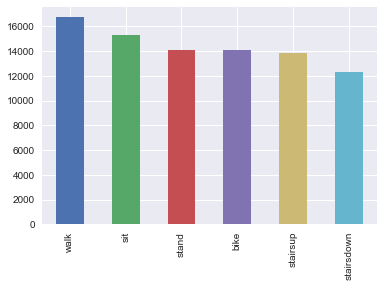

In [8]:
#look at distribution of classes in this dataset
df['gt'].value_counts().plot(kind='bar')

all classes look mostly balanced, so our accuracy metric will be fairly representative of actual performance and we should(hopefully) have enough data to predict all classes

In [9]:
#explore each column
df['Arrival_Time'].describe()

count    1.000000e+05
mean     1.424745e+12
std      4.387289e+07
min      1.424687e+12
25%      1.424697e+12
50%      1.424778e+12
75%      1.424783e+12
max      1.424789e+12
Name: Arrival_Time, dtype: float64

In [10]:
df['Creation_Time'].describe()

count    1.000000e+05
mean     6.803251e+17
std      7.115907e+17
min      4.513322e+11
25%      5.534593e+13
50%      3.506395e+14
75%      1.424778e+18
max      1.424791e+18
Name: Creation_Time, dtype: float64

In [11]:
df['x'].describe()

count    100000.000000
mean         -1.706880
std           3.850524
min         -21.817413
25%          -4.010288
50%          -2.145178
75%          -0.160575
max          17.467878
Name: x, dtype: float64

In [12]:
df['y'].describe()

count    100000.000000
mean          0.158214
std           1.557457
min         -19.514893
25%          -0.692108
50%           0.153227
75%           1.035599
max          11.292253
Name: y, dtype: float64

In [13]:
df['z'].describe()

count    100000.000000
mean          8.933862
std           2.269094
min          -1.647211
25%           7.727112
50%           9.062302
75%           9.940659
max          29.239716
Name: z, dtype: float64

In [14]:
df['User'].value_counts()

e    12462
i    12082
g    12035
b    11763
f    10613
a    10358
d    10265
c    10226
h    10196
Name: User, dtype: int64

In [15]:
df['gt'].value_counts()

walk          16748
sit           15291
stand         14070
bike          14069
stairsup      13873
stairsdown    12330
Name: gt, dtype: int64

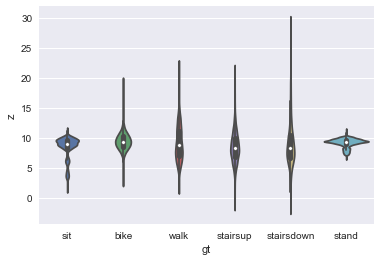

In [16]:
sns.violinplot(data=df, x='gt', y='z')

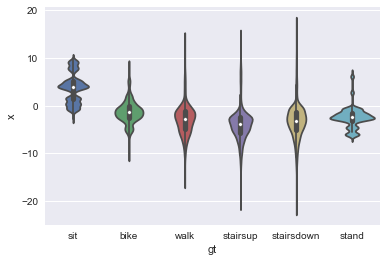

In [17]:
sns.violinplot(data=df, x='gt',y='x')

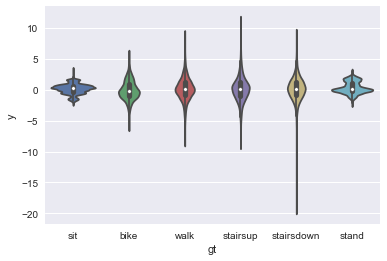

In [18]:
sns.violinplot(data=df, x='gt', y='y')

In [19]:
#sns.pairplot(df, hue='gt')

In [20]:
X = pd.get_dummies(df[['Arrival_Time','Creation_Time','x','y','z','User','Model','Device']])
y = df['gt'].fillna('null')
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Random Forest Baseline

In [21]:
rf_model_base = RandomForestClassifier()
rf_model_base.fit(X_train, y_train)
rf_model_base.score(X_test, y_test)

0.86808

oh wow. already 0.86! let's check other metrics

Intuitively, it makes sense why random forest would do well. If someone is biking, their acceleration in any direction will be greater than walking, standing, etc. So, there are very clear thresholds for which the decision tree can split on. Similarly for standing vs walking, etc.

In [22]:
print(classification_report(y_test,rf_model_base.predict(X_test)))

             precision    recall  f1-score   support

       bike       0.96      0.98      0.97      3545
       null       0.83      0.75      0.79      3397
        sit       0.98      0.99      0.99      3856
 stairsdown       0.65      0.65      0.65      3103
   stairsup       0.70      0.70      0.70      3477
      stand       0.99      1.00      0.99      3476
       walk       0.90      0.95      0.92      4146

avg / total       0.87      0.87      0.87     25000



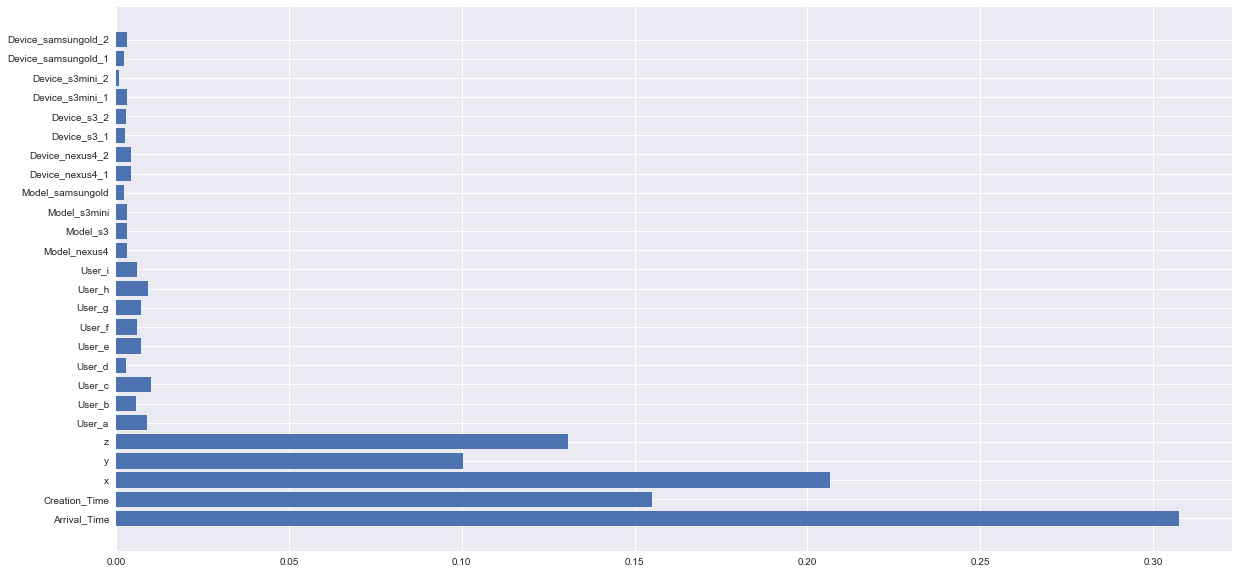

In [23]:
def plot_importances(x, model):
    plt.figure(figsize=(20,10))
    plt.barh(X_train.columns, model.feature_importances_)
plot_importances(X_train, rf_model_base)

### drop null class

In [35]:
df_nna = df.dropna()
df_nna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86381 entries, 0 to 99999
Data columns (total 9 columns):
Arrival_Time     86381 non-null int64
Creation_Time    86381 non-null int64
x                86381 non-null float64
y                86381 non-null float64
z                86381 non-null float64
User             86381 non-null object
Model            86381 non-null object
Device           86381 non-null object
gt               86381 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 6.6+ MB


In [24]:
X = pd.get_dummies(df_nna[['Arrival_Time','Creation_Time','x','y','z','User','Model','Device']])
y = df_nna['gt']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [25]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9111872568994258

In [26]:
print(classification_report(y_test,model.predict(X_test)))

             precision    recall  f1-score   support

       bike       0.99      1.00      0.99      3496
        sit       1.00      1.00      1.00      3841
 stairsdown       0.70      0.71      0.70      3029
   stairsup       0.74      0.71      0.73      3404
      stand       1.00      1.00      1.00      3604
       walk       0.98      0.99      0.98      4222

avg / total       0.91      0.91      0.91     21596



Way better. It makes sense that biking and standing would be the easiest to distinguish since biking has a drastically larger acceleration than these other activities, thus would be easy to threshold and standing, similarly has little or no acceleration in some directions. It looks like we're performing the worst on the stairs activities. Let's keep going.

## including gyroscope data

In [30]:
df_gyroscope = pd.read_csv('Activity recognition exp/Phones_gyroscope_sample.csv')
df_gyroscope.drop(columns=["Index"], inplace=True)

In [31]:
df_gyroscope.head()

,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,1424688041094,266217396755000,0.152411,0.242819,-0.002138,g,s3,s3_2,stairsdown
1,1424785063800,1424785067281667504,0.002945,-0.016434,-0.026398,b,nexus4,nexus4_1,sit
2,1424695229617,1424695227626596438,0.759918,-0.571136,-0.829697,c,nexus4,nexus4_1,bike
3,1424778018221,133150921664000,-0.085216,0.452957,1.072679,i,s3,s3_1,stairsdown
4,1424781680320,1424783525637453074,-0.008484,0.049759,-0.010818,d,nexus4,nexus4_2,stand


In [32]:
df_gyroscope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Arrival_Time     100000 non-null int64
Creation_Time    100000 non-null int64
x                100000 non-null float64
y                100000 non-null float64
z                100000 non-null float64
User             100000 non-null object
Model            100000 non-null object
Device           100000 non-null object
gt               86556 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 6.9+ MB


In [33]:
df_gyroscope.isnull().sum()

Arrival_Time         0
Creation_Time        0
x                    0
y                    0
z                    0
User                 0
Model                0
Device               0
gt               13444
dtype: int64

In [44]:
df.merge(df_gyroscope, on=['User','Model','Device'])

KeyboardInterrupt: 

## looking at effects of data size

In [27]:
from sklearn.model_selection import learning_curve

In [40]:
def plot_learning_curve(X, Y, model, cv=5, train_sizes=np.linspace(.1, 1.0, 15)):

    plt.figure(figsize=(10,5))
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

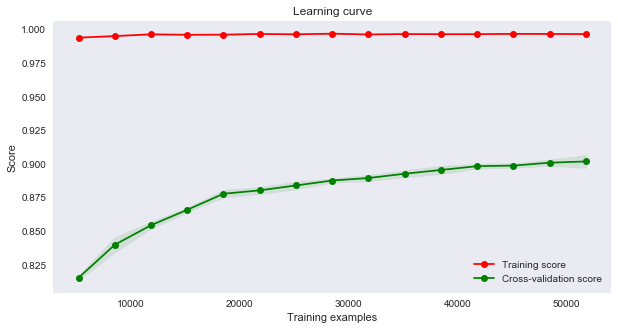

In [41]:
plot_learning_curve(X_train, y_train, model)

this definitely looks like it would benefit from more data, so we will move on to the full 43,000,000 rows in the next notebook using sql and aws